In [1]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the dataset
ccpp_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')

# Let's have a look at what our data is like

In [3]:
ccpp_data.shape

(6410, 5)

In [4]:
ccpp_data.columns

Index(['AT', 'EV', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
ccpp_data.head(10)

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68
5,25.60,66.48,1006.16,69.34,435.12
6,24.56,66.75,1018.50,77.47,435.03
7,18.83,47.83,1005.58,77.07,454.23
8,18.12,43.69,1016.91,52.95,464.68
9,22.09,65.59,1015.54,72.44,447.28


In [6]:
ccpp_data.tail(10)

,AT,EV,AP,RH,PE
6400,15.47,44.90,1021.59,81.74,465.61
6401,17.08,40.12,1012.17,81.50,457.81
6402,18.91,59.21,1017.76,90.49,450.24
6403,19.29,50.16,1010.49,97.78,450.21
6404,23.50,50.78,1008.70,57.70,445.09
6405,23.39,61.87,1010.35,48.91,444.03
6406,11.63,40.55,1022.89,87.12,474.67
6407,27.79,69.23,1012.86,45.71,435.06
6408,12.26,41.50,1014.87,89.41,471.13
6409,11.75,40.55,1018.09,97.70,472.43


In [7]:
ccpp_data.describe()

,AT,EV,AP,RH,PE
count,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,19.652120,54.298786,1013.227959,73.324212,454.363276
std,7.433792,12.685055,5.932562,14.675569,17.060129
min,1.810000,25.360000,992.890000,26.300000,420.260000
25%,13.580000,41.760000,1009.070000,63.352500,439.832500
50%,20.420000,52.080000,1012.955000,74.980000,451.440000
75%,25.720000,66.540000,1017.257500,84.897500,468.270000
max,35.560000,81.560000,1033.300000,100.160000,495.760000


In [8]:
ccpp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


# Checking if there is any missing data

In [9]:
ccpp_data.isnull().sum()

AT    0
EV    0
AP    0
RH    0
PE    0
dtype: int64

# Let's look at our Featues

In [10]:
for i in ccpp_data:
  print(i,':',ccpp_data[i].nunique())

AT : 2536
EV : 613
AP : 2255
RH : 3757
PE : 3910


# Exploratory Data Analysis

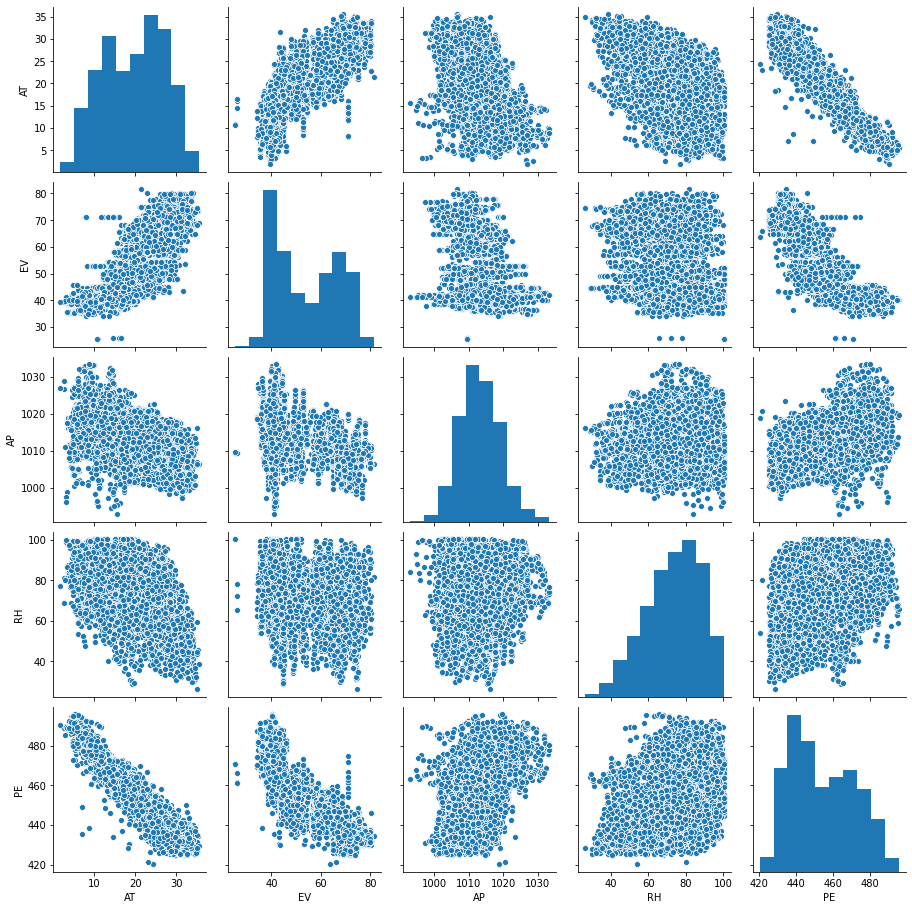

In [ ]:
sns.pairplot(ccpp_data)

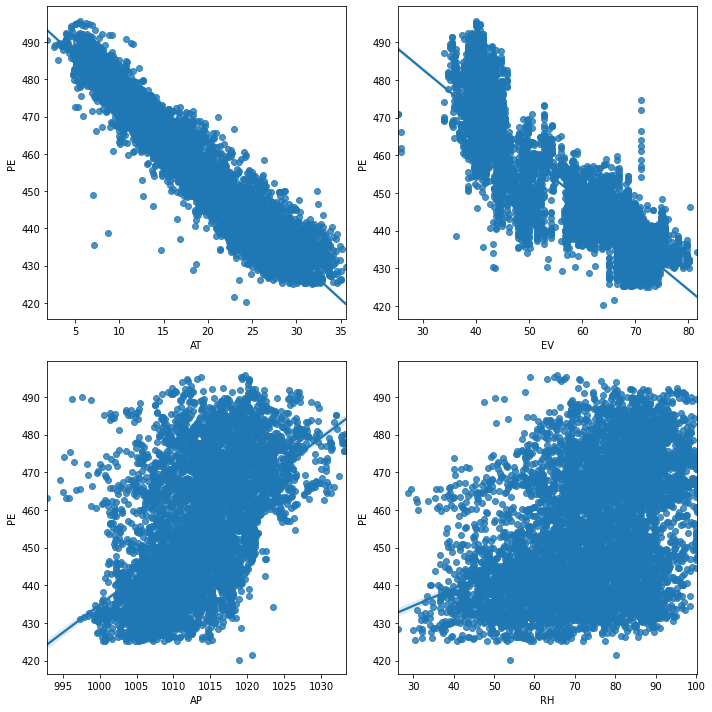

In [ ]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))
sns.regplot(y = ccpp_data['PE'], x = ccpp_data['AT'], ax = axs[0, 0])
sns.regplot(y = ccpp_data['PE'], x = ccpp_data['EV'], ax = axs[0, 1])
sns.regplot(y = ccpp_data['PE'], x = ccpp_data['AP'], ax = axs[1, 0])
sns.regplot(y = ccpp_data['PE'], x = ccpp_data['RH'], ax = axs[1, 1])
plt.tight_layout()

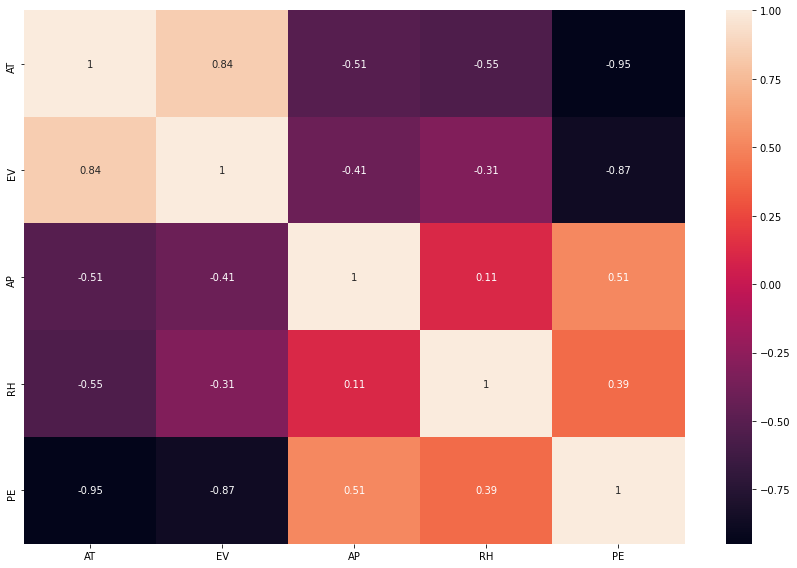

In [ ]:
plt.figure(1, figsize=(12,8))
sns.heatmap(ccpp_data.corr(),annot= True)
plt.tight_layout()

# Train - Test Split

In [104]:
X = ccpp_data.drop('PE',axis=1)
y = ccpp_data[['PE']]

print('X.shape: ',X.shape)
print('y.shape: ',y.shape)

X.shape:  (6410, 4)
y.shape:  (6410, 1)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred = model.predict(X_test)
y_pred

array([[429.0695447 ],
       [439.90983001],
       [477.27121171],
       ...,
       [478.28290235],
       [477.73474192],
       [444.50301901]])

In [112]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(metrics.r2_score(y_test, y_pred))

3.6108450386863167
21.296352158803415
4.614797087500534
0.9268958863234302


In [113]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [114]:
y_dt = dt.predict(X_test)

In [115]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_dt))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_dt))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_dt)))

print(metrics.r2_score(y_test, y_dt))

3.394222568902756
24.513138273530934
4.951074456472144
0.9158536056525106


In [116]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=0)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [117]:
y_rf = model_rf.predict(X_test)

In [118]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_rf))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_rf))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_rf)))

print(metrics.r2_score(y_test, y_rf))

2.5926243369734823
13.271504433562136
3.6430076082218297
0.9544428284461305


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
'''# Number of trees in random forest
n_estimators = [200, 300, 500, 600, 700, 900, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)'''

{'n_estimators': [200, 300, 500, 600, 700, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
'''# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)''''

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
#rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#rf_random.best_score_

-12.5886667588264

In [ ]:
#rf_random_pred = rf_random.best_estimator_.predict(X_test)

In [ ]:
'''# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, rf_random_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, rf_random_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_random_pred)))

print(metrics.r2_score(y_test, rf_random_pred))'''

2.47591785433638
12.466657942451846
3.5308154783919035
0.9572056297437224


# Evaluation Dataset

In [36]:
CCPP_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Testing_set_ccpp.csv')

In [37]:
CCPP_eval.shape

(3158, 4)

In [38]:
CCPP_eval.columns

Index(['AT', 'EV', 'AP', 'RH'], dtype='object')

In [39]:
CCPP_eval.head(10)

,AT,EV,AP,RH
0,19.64,48.06,1014.81,74.96
1,28.26,69.23,1013.01,42.10
2,27.98,67.17,1007.32,75.29
3,28.64,69.23,1013.11,37.13
4,9.34,38.08,1019.56,67.74
5,25.50,68.08,1011.13,72.86
6,21.96,59.80,1016.72,72.60
7,27.17,73.50,1010.36,73.29
8,25.96,71.64,1003.84,86.83
9,10.38,40.92,1021.53,95.18


In [40]:
CCPP_eval.tail(10)

,AT,EV,AP,RH
3148,3.74,35.19,1018.58,98.84
3149,23.94,62.08,1022.47,61.97
3150,10.15,41.46,1019.56,81.79
3151,24.64,72.24,1011.37,80.61
3152,14.66,43.13,1014.97,46.31
3153,22.12,57.19,1007.56,76.50
3154,9.59,38.56,1017.01,60.10
3155,31.38,71.32,1009.17,60.42
3156,12.38,45.51,1016.15,81.37
3157,22.35,65.61,1016.27,73.93


In [41]:
CCPP_eval.describe()

,AT,EV,AP,RH
count,3158.000000,3158.000000,3158.000000,3158.000000
mean,19.649427,54.320047,1013.322242,73.278056
std,7.491428,12.756124,5.951831,14.448482
min,2.340000,25.360000,993.110000,25.560000
25%,13.410000,41.662500,1009.170000,63.195000
50%,20.250000,52.300000,1012.920000,74.965000
75%,25.717500,66.540000,1017.267500,84.545000
max,37.110000,79.740000,1033.250000,100.150000


In [42]:
CCPP_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      3158 non-null   float64
 1   EV      3158 non-null   float64
 2   AP      3158 non-null   float64
 3   RH      3158 non-null   float64
dtypes: float64(4)
memory usage: 98.8 KB


In [43]:
CCPP_eval.isnull().sum()

AT    0
EV    0
AP    0
RH    0
dtype: int64

In [44]:
rf_eval =  model_rf.predict(CCPP_eval)

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(rf_eval)
res.index = CCPP_eval.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction0.csv')         
files.download('prediction0.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#rf_random_eval = rf_random.best_estimator_.predict(CCPP_eval)

In [ ]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(rf_random_eval)
res.index = CCPP_eval.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction1.csv')         
files.download('prediction1.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
lm_eval =  model.predict(CCPP_eval)

In [46]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(lm_eval)
res.index = CCPP_eval.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction2.csv')         
files.download('prediction2.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
dt_eval = dt.predict(CCPP_eval) # best score

In [48]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(dt_eval)
res.index = CCPP_eval.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction3.csv')         
files.download('prediction3.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Second Trail** 

# Data Preprocessing

In [78]:
from sklearn.preprocessing import normalize

data_nor = normalize(ccpp_data)
print(data_nor)

[[0.02710411 0.06644354 0.91533174 0.06001819 0.39168387]
 [0.00509731 0.0354599  0.89664795 0.05574293 0.43775769]
 [0.02657327 0.05806584 0.9129145  0.05576415 0.39924891]
 ...
 [0.02513089 0.06260566 0.91594348 0.04133619 0.39343085]
 [0.01091432 0.03694489 0.90347606 0.0795962  0.41941793]
 [0.01042223 0.03596779 0.90304444 0.08665977 0.41904477]]


In [79]:
data_nor = pd.DataFrame(data_nor)
print(data_nor)

             0         1         2         3         4
0     0.027104  0.066444  0.915332  0.060018  0.391684
1     0.005097  0.035460  0.896648  0.055743  0.437758
2     0.026573  0.058066  0.912915  0.055764  0.399249
3     0.029787  0.067439  0.917675  0.045746  0.387742
4     0.015168  0.035652  0.903654  0.075119  0.419840
...        ...       ...       ...       ...       ...
6405  0.021135  0.055906  0.912957  0.044195  0.401228
6406  0.010276  0.035828  0.903768  0.076974  0.419392
6407  0.025131  0.062606  0.915943  0.041336  0.393431
6408  0.010914  0.036945  0.903476  0.079596  0.419418
6409  0.010422  0.035968  0.903044  0.086660  0.419045

[6410 rows x 5 columns]


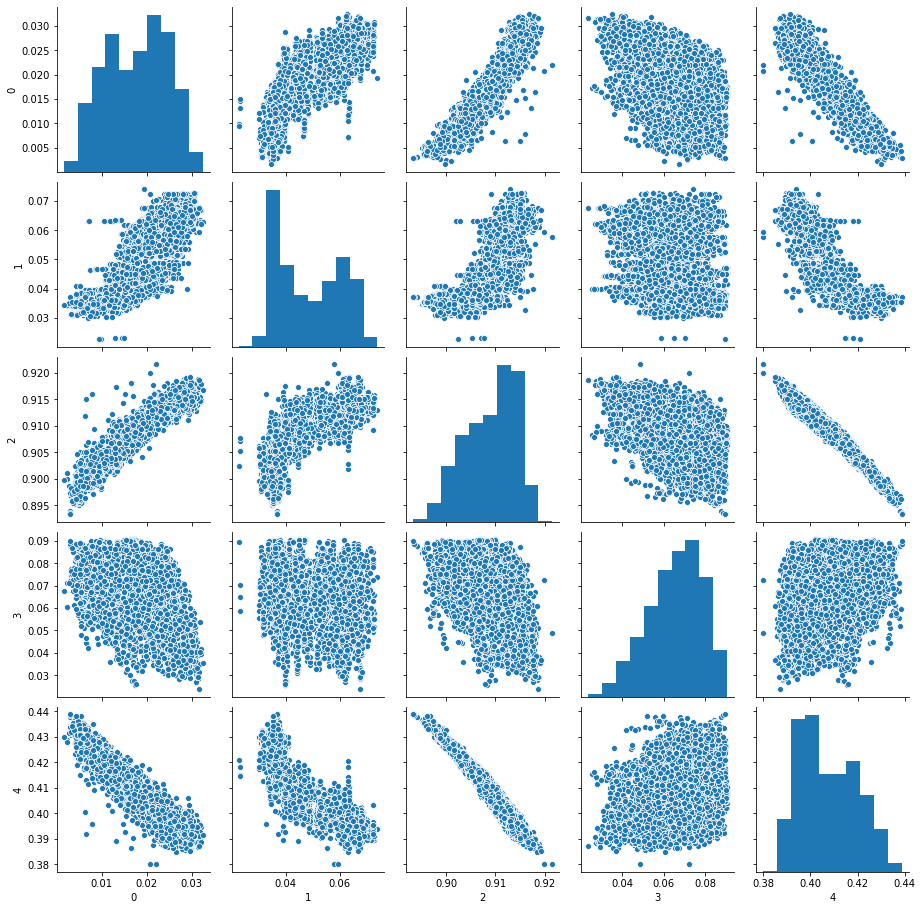

In [80]:
sns.pairplot(data_nor)

In [81]:
data_nor.columns

RangeIndex(start=0, stop=5, step=1)

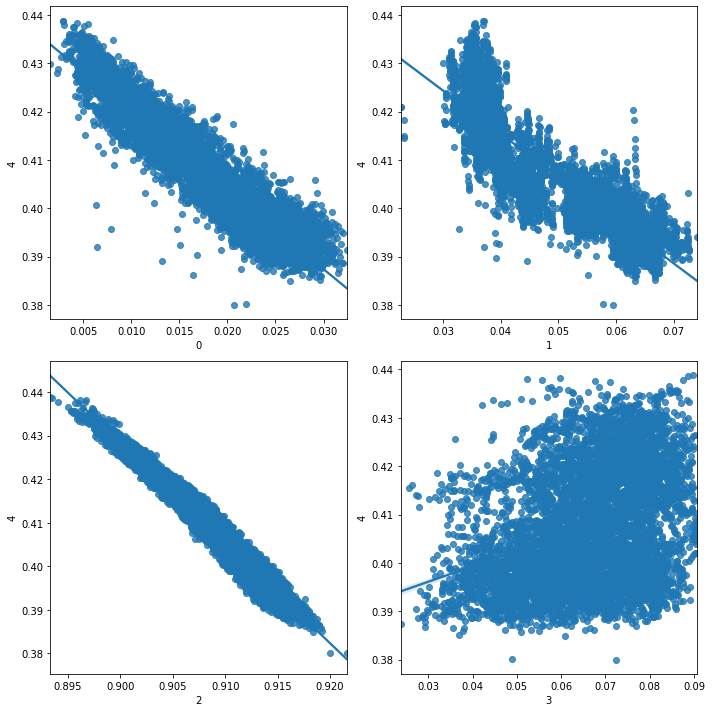

In [82]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))
sns.regplot(y = data_nor[4], x = data_nor[0], ax = axs[0, 0])
sns.regplot(y = data_nor[4], x = data_nor[1], ax = axs[0, 1])
sns.regplot(y = data_nor[4], x = data_nor[2], ax = axs[1, 0])
sns.regplot(y = data_nor[4], x = data_nor[3], ax = axs[1, 1])
plt.tight_layout()

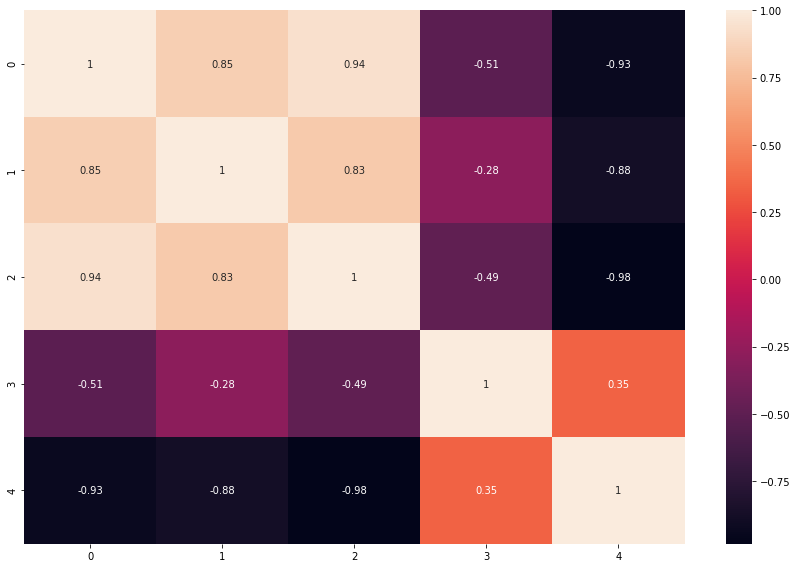

In [96]:
plt.figure(1, figsize=(12,8))
sns.heatmap(data_nor.corr(),annot= True)
plt.tight_layout()

In [84]:
 X_norm = data_nor.drop(4,axis=1)
 y_norm = data_nor[4]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.3, random_state=42)

In [87]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [88]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, lr_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, lr_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

print(metrics.r2_score(y_test, lr_pred))

0.0002994002502901705
1.4909840486608797e-07
0.0003861326260057391
0.9989489681953052


# Data Preprocessing on Evaluation Data

In [119]:
eval_nor = normalize(CCPP_eval)
print(eval_nor)

[[0.01927572 0.04716859 0.99598749 0.07356966]
 [0.0277975  0.06809699 0.99643125 0.041411  ]
 [0.02762782 0.06632455 0.99464113 0.07434234]
 ...
 [0.0309475  0.07033702 0.99526093 0.05958725]
 [0.01213139 0.04459608 0.99574404 0.07973596]
 [0.02188365 0.06424101 0.99506495 0.07238741]]


In [93]:
data_eval_nor = pd.DataFrame(eval_nor)
print(data_eval_nor)

             0         1         2         3
0     0.019276  0.047169  0.995987  0.073570
1     0.027798  0.068097  0.996431  0.041411
2     0.027628  0.066325  0.994641  0.074342
3     0.028174  0.068103  0.996611  0.036525
4     0.009134  0.037240  0.997066  0.066246
...        ...       ...       ...       ...
3153  0.021851  0.056494  0.995299  0.075569
3154  0.009406  0.037820  0.997500  0.058947
3155  0.030947  0.070337  0.995261  0.059587
3156  0.012131  0.044596  0.995744  0.079736
3157  0.021884  0.064241  0.995065  0.072387

[3158 rows x 4 columns]


In [94]:
# BEST Score
lr_eval = lr.predict(data_eval_nor) # Final Prediction 

In [95]:
'''# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(lr_eval)
res.index = CCPP_eval.index # its important for comparison
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction4.csv')         
files.download('prediction4.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>